<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 09 **
** ┗ Credit card fraud transaction prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Significant variable selection」
* 🥈SESSION 2 -「Find out the characteristics of fraud」
* 🥇SESSION 3 -「ML Utilization Fraud Transaction Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/09_Credit Card Fraud Transaction Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/09_Credit Card Fraud Transaction Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 💳😠 (Service Operator, Risk Management, Detective Detective)

``
Card Company A has recently rotted with the cost of commission transactions due to the recent Bitcoin craze.Bitcoin payment is made with a credit card
It's getting a fee, but it's because the customer claim is pouring out a fraudulent transaction.Therefore, the card company is a fraudulent transaction
In the case of predicted transactions, we want to limit the transaction.
``


> ** Looking at the data **

* Trading standard spending data
* Data specification ⬇

| Account_age_days |Transaction_AMT |Transaction_ADJ_AMT | Historic_velocity | IP_ADDRESS | User_agent |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Last day after the creation of the account | Transaction amount | Transaction adjustment amount | Past transaction amount | IP address | Environment of usage |
| email_domain | Phone_number | Billing_city | Billing_postal | Billing_state | Card_bin |
| EMAIL Domain | Phone Number | Claims | Claims Number | Claimer | Card BIN number (6 digits in front) |
| Currency | CVV | Signature_image | Transaction_TYPE | Transaction_ENV | Event_timestamp | Applicant_name |
| Call | CVV | Signature image | Type of transaction | Transaction environment | Transaction date |
Billing_address | MERCHANT_ID | locale | Transaction_initiate | Days_since_last_logon | inital_amount |
| Claim Address | Shop ID | Region | Early Code of Transaction | Last Last Last Last Day | Initial balance |
| Event_label |
| Whether it's fraud |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter09_credit_fraud.csv')
df.head(10)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit
5,2212.0,1854.0,50.0,4539.0,208.245.197.202,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,merritt-bolton.com,+1-521-593-1520,Graymouth,552.0,...,D,2021-01-07 20:51:06,Maureen Garcia,9406 Phillips Spurs,334-79-0930,ayc_PE,I,46.0,1714.0,legit
6,4168.0,3528.0,59.0,5557.0,199.181.138.165,Opera/9.50.(Windows 95; lij-IT) Presto/2.9.164...,hodge.com,798-318-1561x1133,Goodmanton,91927.0,...,C,2021-07-14 22:22:51,Nicole Hodge,82346 Ramirez Viaduct Suite 561,013-09-1555,iu_CA,P,64.0,5921.0,legit
7,6034.0,3177.0,53.0,6296.0,58.161.134.204,Opera/9.46.(X11; Linux x86_64; km-KH) Presto/2...,henderson-david.com,621.175.0084,Rogersshire,40459.0,...,U,2020-12-25 14:21:35,Regina Garrett,39904 Mcdaniel Lodge Apt. 421,167-90-9905,sv_SE,K,84.0,5301.0,legit
8,5721.0,2970.0,55.0,5732.0,37.103.250.147,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_0)...,espinoza-robinson.com,711-053-8116x7882,Kimbury,78204.0,...,G,2021-03-24 06:57:09,Richard Dickson,9334 Thomas Stream Suite 199,568-97-7886,the_NP,W,87.0,4302.0,legit
9,3278.0,1574.0,72.0,3958.0,125.193.157.2,Mozilla/5.0 (iPad; CPU iPad OS 10_3_4 like Mac...,frost-kidd.com,813-713-6438x658,East Christinefort,92649.0,...,D,2021-02-05 13:17:46,Maria Brown,0965 Daniel Isle,877-38-1855,nan_TW,U,100.0,7005.0,legit



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Increase claim due to fraud, reduced brand image, and withdrawal from customer
``

> ** Expected effect **

``
▶ Customer claim reduction, brand image recovery, customer defense by limiting fraud transactions
``

> ** Solution **

``
▶ Card spending data use fraudulent transaction prediction
▶ Session 1 🥉
-Data pretreatment and meaningful variables and exploration
▶ Session 2 🥈
-Numeric (continuous, number type) variable and categorical (category) variable
▶ Session 3 🥇
-Exual fraudulent transactions using ML algorithms
``

> ** Performance measurement **

``
▶ Number of CLAIM reductions before/after model application
``

> ** Public application **

``
▶ Card Spending Data Real -time collection
▶ When transactions occur, all transactions DATA models input extracted fraudulent transactions
▶ Restrictions on the number of transactions with high possibility of fraudulent fraudulent
``

> ** Main code preview **

``
▶ Session 1 → Split, Apply (Lambda x :), List.append
▶ Session 2 → np.where, reset_index (), SNS.distplot, SNS.CATPLOT
▶ Session 3 → Train_test_split, Classification_report, ROC_AUC_SCORE
``


## ** 🥉Session 1 **
** ┗ Select meaningful variable **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 150,000 row, 26 COL
print('df', df.shape)

df (150000, 26)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address               127
user_agent               113
email_domain              90
phone_number             127
billing_city             116
billing_postal           124
billing_state            113
card_bin                 128
currency                 108
cvv                      123
signature_image          105
transaction_type         116
transaction_env          123
EVENT_TIMESTAMP          112
applicant_name           143
billing_address          134
merchant_id              107
locale                   134
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64


In [ ]:
# ▶ Remove all of the missing rows (※ Batch Drop
df=df.dropna(axis=0)

In [ ]:
# ▶ Outlier confirmation, negative value check
df.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000
mean,4645.817224,2521.343592,54.208837,4702.388673,50179.458129,41834.312320,49.858524,7996.856367
std,1153.792072,604.680167,10.068128,1188.255402,28389.219411,10082.094148,29.208844,4047.922681
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25298.000000,35386.000000,24.000000,4485.000000
50%,4668.000000,2543.000000,55.000000,4729.000000,50072.000000,42086.000000,50.000000,7999.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74346.000000,47373.000000,75.000000,11495.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [ ]:
print(df['user_agent'].head(1))

0    Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...
Name: user_agent, dtype: object


In [ ]:
# ▶ User_agent browser name selection
df['user_agent'] = df['user_agent'].apply(lambda x: x.split('/')[0])

In [ ]:
df.head(3)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit


In [ ]:
df['EVENT_LABEL'].value_counts()

,count
EVENT_LABEL,
legit,138996
fraud,8004


In [ ]:
# ▶ 5% fraudulent transaction rate
(8004 / (8004 + 138996) ) * 100

5.444897959183673

### · Select meaningful variable
---
* What is a meaningful variable
-The variable that the data you want to predict by the variable * is well classified *
  

* Numeric variable
-The continuous variable is changed to a category variable through the intervalization, and *
(※ There is a difference in the morale transaction rate of the grouping group compared to the average fraudulent transaction rate.
  
* Categorical variable
-Check that the data you want to predict for each group is divided
(※ Each group has a difference in fraudulent transaction rate)


In [ ]:
# ▶ Data type confirmation of one COL
df['account_age_days'].dtypes

dtype('float64')

In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']
numeric_list : ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']


## ** 🥈Session 2 **
** ┗ Identify the characteristics of fraudulent transactions **
---


### · Numeric variable
---


In [ ]:
print("numeric_list :", numeric_list)

numeric_list : ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']


In [ ]:
# ▶ Numeric_list only output
df[numeric_list]

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
0,3371.0,2167.0,56.0,2572.0,96336.0,40771.0,59.0,13646.0
1,2714.0,2045.0,48.0,4517.0,78083.0,24480.0,0.0,11930.0
2,6987.0,2892.0,61.0,5007.0,83236.0,37778.0,83.0,7412.0
3,2712.0,3040.0,28.0,6022.0,78364.0,55790.0,24.0,4623.0
4,3598.0,2976.0,66.0,2600.0,77499.0,37370.0,21.0,1905.0
...,...,...,...,...,...,...,...,...
149995,3986.0,2890.0,57.0,4544.0,34817.0,30017.0,99.0,6681.0
149996,5834.0,1875.0,61.0,4369.0,35879.0,65507.0,85.0,2402.0
149997,4781.0,3371.0,48.0,5135.0,84167.0,47079.0,22.0,4113.0
149998,6085.0,2306.0,59.0,4846.0,80391.0,25891.0,70.0,4531.0


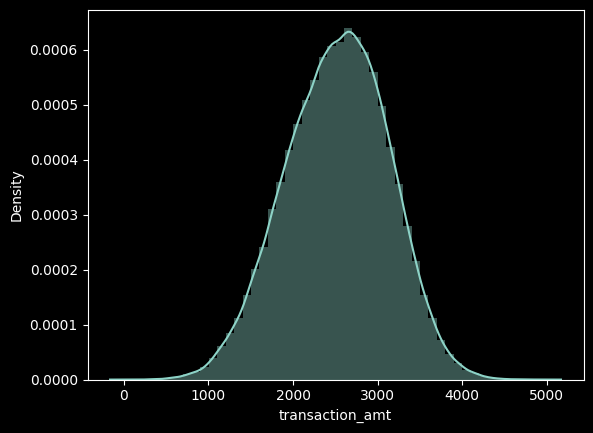

In [ ]:
# ▶ Check the distribution in transaction_AMT
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['transaction_amt']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['transaction_amt_gp'] = np.where (df['transaction_amt'] <= 2000, 1,
                           np.where(df['transaction_amt'] <= 3000, 2, 3))

df[['transaction_amt','transaction_amt_gp']]

,transaction_amt,transaction_amt_gp
0,2167.0,2
1,2045.0,2
2,2892.0,2
3,3040.0,3
4,2976.0,2
...,...,...
149995,2890.0,2
149996,1875.0,1
149997,3371.0,3
149998,2306.0,2


In [ ]:
# ▶ Fraudulent transaction according to the sectionalization
df.groupby(['transaction_amt_gp', 'EVENT_LABEL'])['transaction_amt'].count()

transaction_amt_gp  EVENT_LABEL
1                   fraud            353
                    legit          29420
2                   fraud           4825
                    legit          79588
3                   fraud           2826
                    legit          29988
Name: transaction_amt, dtype: int64

In [ ]:
# ▶ According to the group, the fraud transaction rate is divided properly.(※ 5%average fraudulent transaction rate)
print("gp1 :", 353 / (353+29420))
print("gp2 :", 4825 / (4825+79588))
print("gp3 :", 2826 / (2826+29988))

gp1 : 0.011856379941557787
gp2 : 0.057159442266001684
gp3 : 0.08612177729018101


In [ ]:
# ▶ Make it in the form of DataFrame (step 1)
df_tran = pd.DataFrame(df.groupby(['transaction_amt_gp', 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

,transaction_amt_gp,EVENT_LABEL,EVENT_TIMESTAMP
0,1,fraud,353
1,1,legit,29420
2,2,fraud,4825
3,2,legit,79588
4,3,fraud,2826


In [ ]:
# ▶ Make it in the form of DataFrame (Step 2)
df_pivot = pd.pivot_table(df_tran,                         # Pivot data frame
                      index = 'transaction_amt_gp',        # Passes in the line
                      columns = 'EVENT_LABEL',             # Heat to enter the column position
                      values = 'EVENT_TIMESTAMP')          # Open to be used as data

df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']
df_pivot.head(5)

,transaction_amt_gp,fraud,legit
0,1,353.0,29420.0
1,2,4825.0,79588.0
2,3,2826.0,29988.0


In [ ]:
# ▶ Make it in the form of DataFrame (step 3)
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,transaction_amt_gp,fraud,legit,ratio
0,1,353.0,29420.0,1.2
1,2,4825.0,79588.0,5.7
2,3,2826.0,29988.0,8.6


### · categorical variable
---


In [ ]:
df.head(2)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,transaction_amt_gp
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit,2
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit,2


In [ ]:
print("categoical_list :", categoical_list)

categoical_list : ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [ ]:
df[categoical_list].head(5)

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,EVENT_LABEL
0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,California,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,legit
1,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,Florida,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,legit
2,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,Utah,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,legit
3,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,Virginia,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,legit
4,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,South Carolina,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,legit


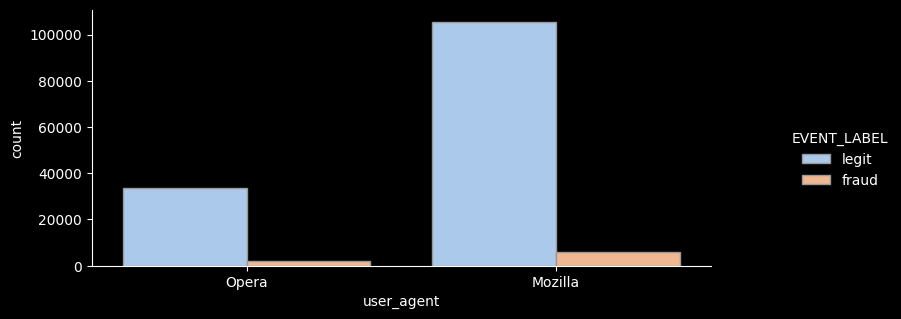

In [ ]:
# ▶ Comparison of fraudulent transaction rate according to User Agent
sns.catplot(x="user_agent", hue="EVENT_LABEL", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
cat_val='user_agent'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,                  # Pivot data frame
                      index = cat_val,              # Passes in the line
                      columns = 'EVENT_LABEL',      # Heat to enter the column position
                      values = 'EVENT_TIMESTAMP')   # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,user_agent,fraud,legit,ratio
0,Mozilla,6121.0,105492.0,5.5
1,Opera,1883.0,33504.0,5.3


In [ ]:
# ▶ Currency configuration
df['currency'].value_counts()

,count
currency,
cad,111543
usd,31151
eur,4306


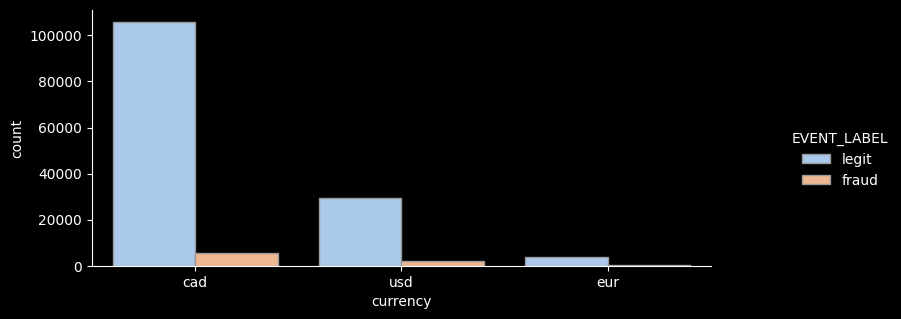

In [ ]:
# ▶ Comparison of fraudulent transaction rate according to Currency
sns.catplot(x="currency", hue="EVENT_LABEL", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
cat_val='currency'

# ▶ Step 1
df_tran = pd.DataFrame(df.groupby([cat_val, 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

# ▶ Step 2
df_pivot = pd.pivot_table(df_tran,                   # Pivot data frame
                      index = cat_val,               # Passes in the line
                      columns = 'EVENT_LABEL',       # Heat to enter the column position
                      values = 'EVENT_TIMESTAMP')    # Open to be used as data
# ▶ Step 3
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ Step 4
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,currency,fraud,legit,ratio
0,cad,5674.0,105869.0,5.1
1,eur,443.0,3863.0,10.3
2,usd,1887.0,29264.0,6.1


## ** 🥇Session 3 **
** ┗ ML Utilization Fraud Transaction Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,transaction_amt_gp
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit,2
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit,2
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit,2
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit,3
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit,2


In [ ]:
# ▶ Train/Test Data cannot input data in the form of characters (STR).
# ▶ Change the target data to 1 and 0 that can be understood in Model
import numpy as np
df['EVENT_LABEL']=np.where(df['EVENT_LABEL']=='fraud', 1, 0)
df['EVENT_LABEL'].value_counts()

,count
EVENT_LABEL,
0,138996
1,8004


In [ ]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['EVENT_TIMESTAMP','EVENT_LABEL', 'transaction_amt_gp'], axis=1)
Y=df['EVENT_LABEL']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(102900, 24)
(102900,)
(44100, 24)
(44100,)


In [ ]:
# ▶ Label Encoding Previous Category Variable List Check
print(categoical_list)

['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [ ]:
# ▶ The category variable that will not be used is excluded from the list
categoical_list.remove('EVENT_LABEL')
categoical_list.remove('EVENT_TIMESTAMP')

In [ ]:
print(categoical_list)

['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate']


In [ ]:
# ▶ Categorical (category) variables must be changed to numeric variables via one-hot-encoding or label-encoding
# ▶ One-Hot-Encoding is disadvantageous for a variable with a lot of dimensions, and label-encoding is difficult to use in regression algorithms.
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

ip_address
user_agent
email_domain
phone_number
billing_city
billing_state
currency
cvv
signature_image
transaction_type
transaction_env
applicant_name
billing_address
merchant_id
locale
tranaction_initiate


In [ ]:
x_train[categoical_list].head(3)

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,locale,tranaction_initiate
140239,2913,0,2600,9590,768,31,0,22,3,8,5,27020,19808,54502,53,19
93001,11445,0,3982,2903,3062,13,2,5,16,22,2,3535,21639,38400,47,12
89736,641,0,1719,7636,1936,4,0,3,8,3,22,91452,18567,31101,155,9


In [ ]:
x_test[categoical_list].head(3)

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,locale,tranaction_initiate
114266,3534,0,4129,2752,6948,4,0,6,22,8,14,51962,96999,143740,47,7
42291,2181,1,2962,1886,6372,21,2,2,20,25,5,41661,27228,47050,206,24
122480,9464,1,1514,7830,1838,38,0,3,20,6,25,21302,108301,67029,192,12


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=8, n_estimators=500)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     97297
           1       0.97      0.34      0.50      5603

    accuracy                           0.96    102900
   macro avg       0.97      0.67      0.74    102900
weighted avg       0.96      0.96      0.96    102900

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41699
           1       0.96      0.31      0.46      2401

    accuracy                           0.96     44100
   macro avg       0.96      0.65      0.72     44100
weighted avg       0.96      0.96      0.95     44100



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,43337
1,763


In [ ]:
# ▶ ROC concept emergence
# ▶ Metric used to evaluate the performance of binary classifiers, and the closer to 100, the better the model performance (※)
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9463067896031077
roc_score_test : 0.9337391285570227


### · Identify important variables
---
* Finding important variables through feature IMP analysis


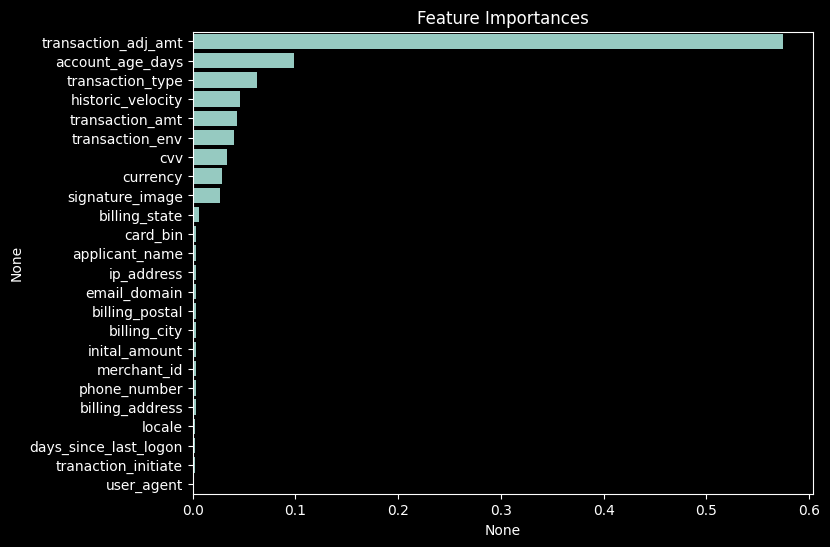

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

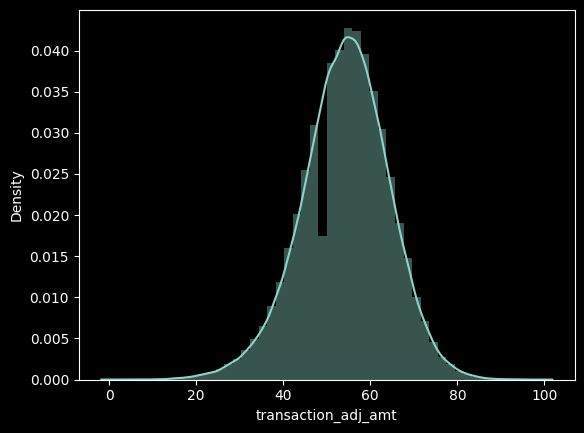

In [ ]:
# ▶ Details for important variables No. 1

sns.distplot(df['transaction_adj_amt']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['transaction_adj_amt_gp'] = np.where (df['transaction_adj_amt'] <= 40, 1,
                           np.where(df['transaction_adj_amt'] <= 60, 2, 3))

df[['transaction_adj_amt','transaction_adj_amt_gp']]

,transaction_adj_amt,transaction_adj_amt_gp
0,56.0,2
1,48.0,2
2,61.0,3
3,28.0,1
4,66.0,3
...,...,...
149995,57.0,2
149996,61.0,3
149997,48.0,2
149998,59.0,2


In [ ]:
df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()

transaction_adj_amt_gp  EVENT_LABEL
1                       0               8072
                        1               4628
2                       0              92394
                        1               3131
3                       0              38530
                        1                245
Name: EVENT_TIMESTAMP, dtype: int64

In [ ]:
# ▶ The smaller the adjusted amount, the higher the probability of fraud transactions.(※ Critical variable).
print("gp1 :", (4628 / (4628+8072)) * 100)
print("gp2 :", (3131 / (3131+92394)) * 100)
print("gp3 :", (245 / (245+38530)) * 100)

gp1 : 36.44094488188976
gp2 : 3.277676001046846
gp3 : 0.6318504190844616



### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)